**Recession USA**

In [1]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt           
import datetime as dt                     
import seaborn as sns
import matplotlib.dates as mdates
import pandas_datareader.data as web    
import statsmodels.formula.api as smf


In [2]:
codes = ['GDP']  

GDP = web.DataReader(codes, 'fred', start='2000-01-01',end='2023-12-31')

print(GDP.head(2), '\n', GDP.tail(2))

                  GDP
DATE                 
2000-01-01  10002.179
2000-04-01  10247.720 
                   GDP
DATE                 
2023-07-01  27610.128
2023-10-01  27956.998


In [3]:
quarterly_freq = pd.offsets.QuarterBegin(startingMonth=4)
codes = ['UNRATE']  

Unemp = web.DataReader(codes, 'fred', start='2000-01-01',end='2023-12-31')

Unemp.reset_index(inplace=True)
Unemp['DATE'] = pd.to_datetime(Unemp['DATE']) 
Unemp.set_index('DATE', inplace=True) 
Unemp = Unemp.resample(quarterly_freq).mean() 
Unemp =Unemp.rename(columns={'UNRATE':'Unemp'})
print(Unemp.head(2), '\n', Unemp.tail(2))

               Unemp
DATE                
2000-01-01  4.033333
2000-04-01  3.933333 
                Unemp
DATE                
2023-07-01  3.700000
2023-10-01  3.733333


In [4]:

codes = ['USREC']  

Recession = web.DataReader(codes, 'fred', start='2000-01-01',end='2023-12-31')
Recession.reset_index(inplace=True)
Recession['DATE'] = pd.to_datetime(Recession['DATE']) 
Recession.set_index('DATE', inplace=True) 
print(Recession.head(2), '\n',Recession.tail(2))

            USREC
DATE             
2000-01-01      0
2000-02-01      0 
             USREC
DATE             
2023-11-01      0
2023-12-01      0


In [5]:
Recession['USREC'].unique()

array([0, 1], dtype=int64)

In [6]:
Recession['USREC']=Recession['USREC'].replace({1:14})
Recession['USREC'].unique()

array([ 0, 14], dtype=int64)

In [7]:
fred = pd.merge(left=GDP, right=Unemp, left_index=True, right_index=True, how='outer')
fred.head(30)

,GDP,Unemp
DATE,,
2000-01-01,10002.179,4.033333
2000-04-01,10247.720,3.933333
2000-07-01,10318.165,4.000000
2000-10-01,10435.744,3.900000
2001-01-01,10470.231,4.233333
2001-04-01,10599.000,4.400000
2001-07-01,10598.020,4.833333
2001-10-01,10660.465,5.500000
2002-01-01,10783.500,5.700000


In [8]:
fred.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 96 entries, 2000-01-01 to 2023-10-01
Data columns (total 2 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   GDP     96 non-null     float64
 1   Unemp   96 non-null     float64
dtypes: float64(2)
memory usage: 2.2 KB


In [9]:
fred.describe()

,GDP,Unemp
count,96.000000,96.000000
mean,16846.501375,5.763542
std,4683.330127,1.965504
min,10002.179000,3.500000
25%,13530.421000,4.308333
50%,15955.532000,5.200000
75%,19944.129250,6.683333
max,27956.998000,13.000000


In [10]:
fred.isnull().sum()

GDP      0
Unemp    0
dtype: int64

In [11]:
fred['GDP_Growth'] = (fred['GDP'].diff() / fred['GDP'].shift(1)) * 100
fred

,GDP,Unemp,GDP_Growth
DATE,,,
2000-01-01,10002.179,4.033333,NaN
2000-04-01,10247.720,3.933333,2.454875
2000-07-01,10318.165,4.000000,0.687421
2000-10-01,10435.744,3.900000,1.139534
2001-01-01,10470.231,4.233333,0.330470
...,...,...,...
2022-10-01,26408.405,3.566667,1.591736
2023-01-01,26813.601,3.500000,1.534345
2023-04-01,27063.012,3.566667,0.930166


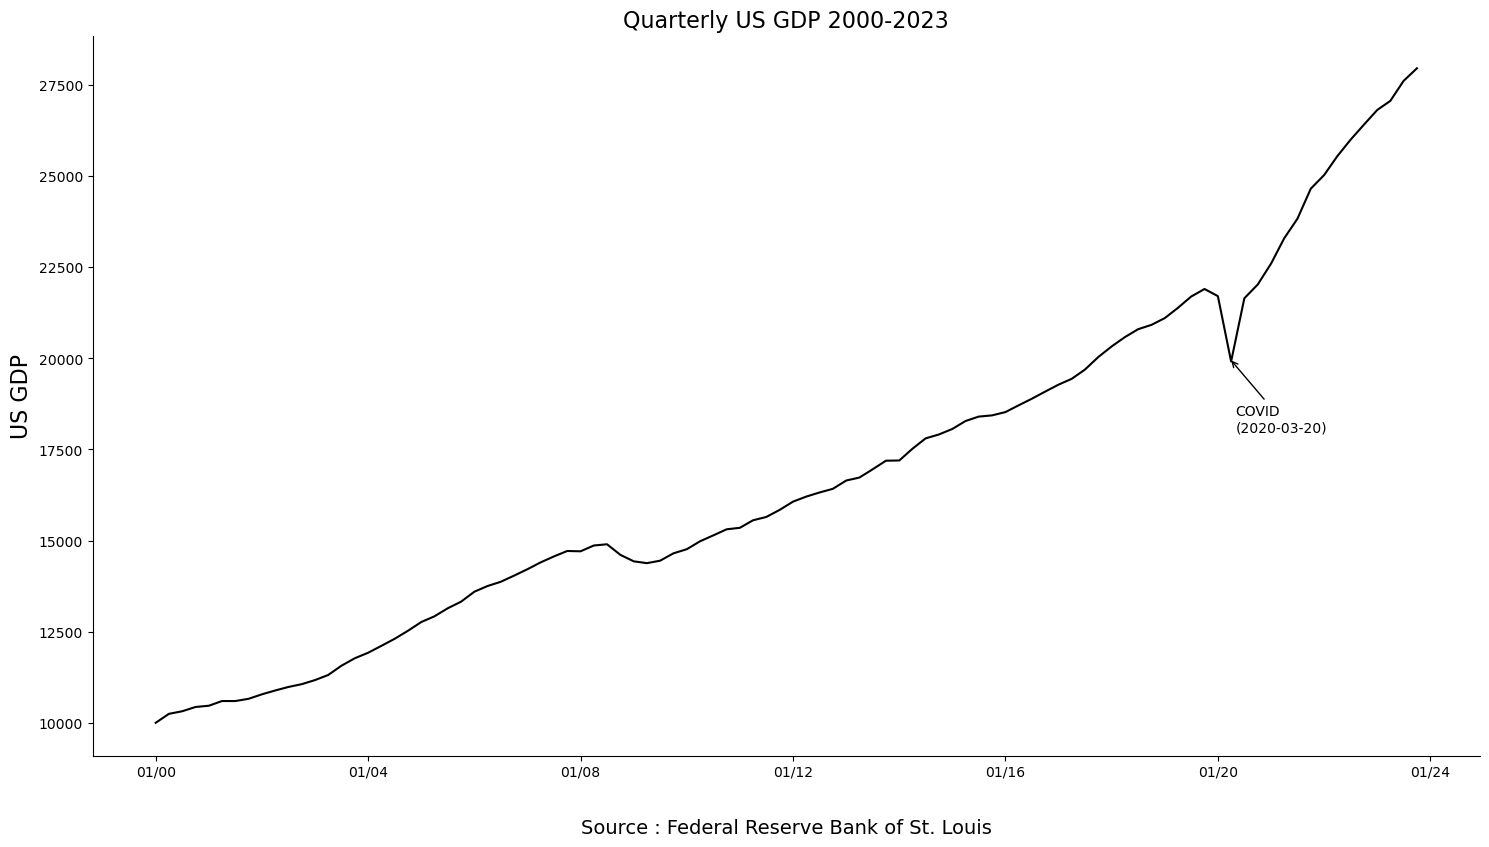

In [12]:
fred_gdp=fred.loc['2000-01-01':'2023-10-01']

fig, ax = plt.subplots(figsize=(15,8)) 

ax.plot(fred_gdp.index, fred_gdp['GDP'], color='black')                    


ax.set_ylabel('US GDP',fontsize=16)
ax.set_title('Quarterly US GDP 2000-2023',fontsize=16)
ax.ticklabel_format(axis='y', style='plain')

COVID_dt = dt.datetime(2020, 3, 20)
COVID_label = 'COVID\n(' + COVID_dt.strftime('%Y-%m-%d') + ')'

#ax.axvline(x=volume_dt, color='black', linewidth=0.75, linestyle='--')
ax.annotate(COVID_label, xy=(COVID_dt, 20000), xytext=(dt.datetime(2020, 4, 30), 18000),
                arrowprops={'facecolor': 'black', 'arrowstyle': '->'}, color='black')



ax.xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))

plt.tight_layout()  
source_text = 'Source : Federal Reserve Bank of St. Louis'
ax.text(0.5, -0.1, source_text, ha='center', va='center', transform=ax.transAxes, fontsize=14, color='black')
sns.despine(ax=ax)

plt.show()

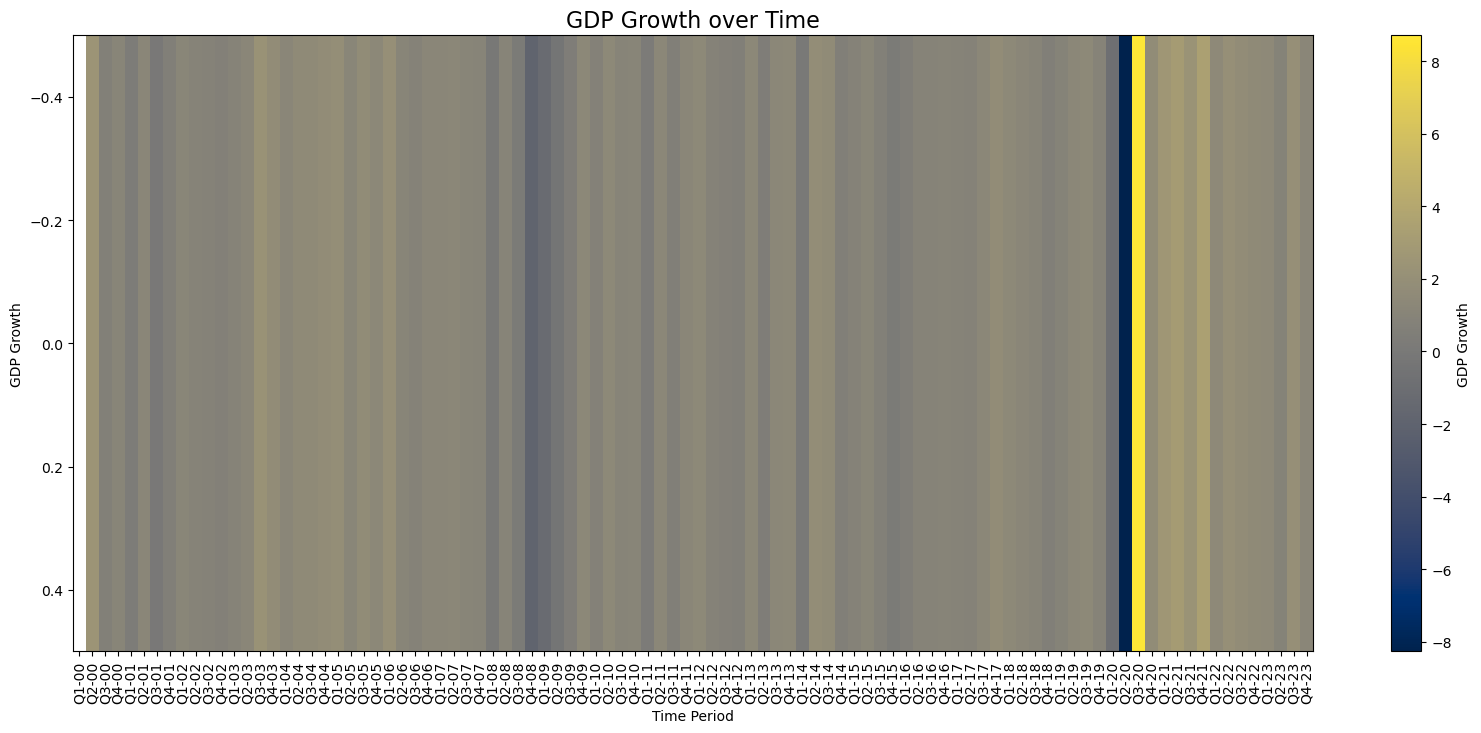

In [13]:

fig, ax = plt.subplots(figsize=(20,8)) 
heatmap = ax.imshow([fred_gdp['GDP_Growth']], cmap='cividis', aspect='auto')
quarters = [f'Q{date.quarter}-{str(date.year)[2:]}' for date in fred_gdp.index]
ax.set_xticks(range(len(fred_gdp.index)))
ax.set_xticklabels(quarters, rotation=90)
plt.xlabel('Time Period')
plt.ylabel('GDP Growth')
plt.title('GDP Growth over Time',fontsize=16)

plt.colorbar(heatmap, label='GDP Growth')

plt.show()


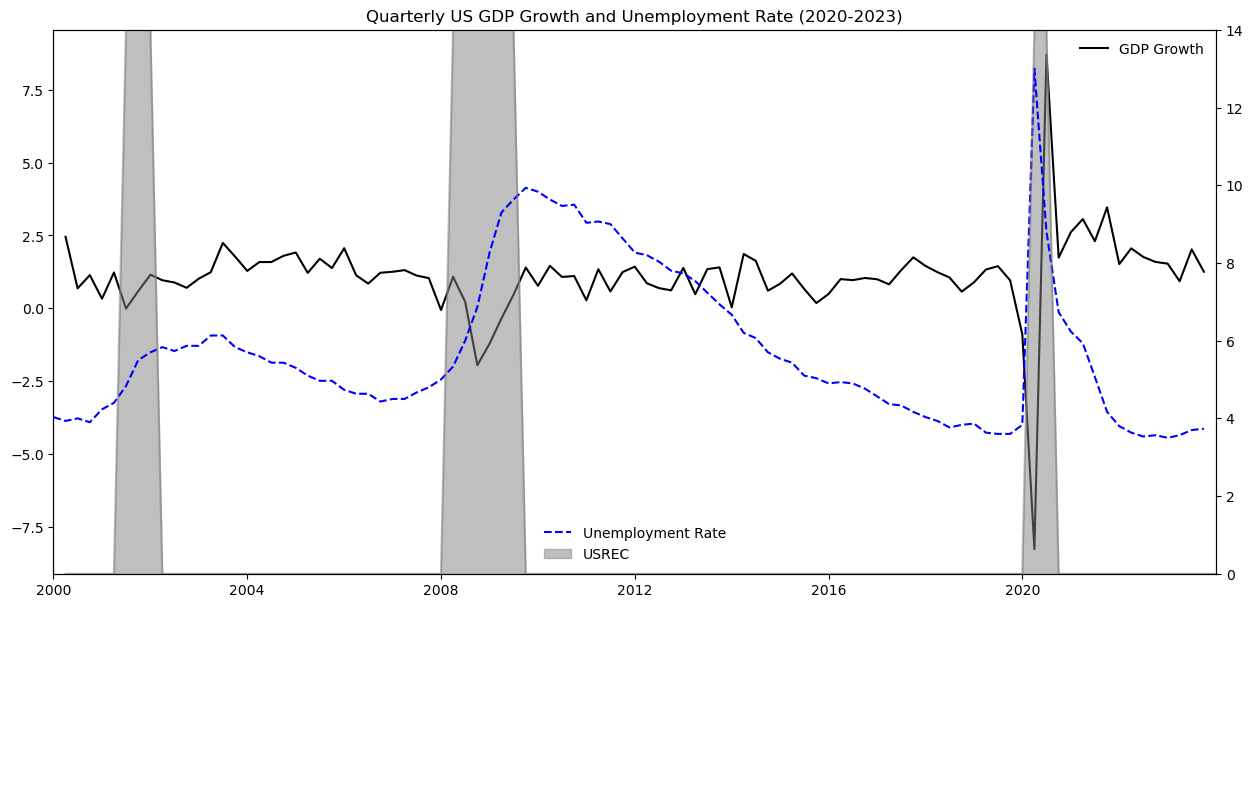

In [14]:
Recession_quarterly = Recession.resample('Q').max()

fig, ax1 = plt.subplots(figsize=(15, 8))

ax2 = ax1.twinx()

ax1.plot(fred_gdp.index, fred_gdp['GDP_Growth'], color='black', label='GDP Growth')

ax2.plot(fred_gdp.index, fred_gdp['Unemp'], color='blue', ls='--', label='Unemployment Rate')
Recession_quarterly.plot.area(ax=ax2, alpha=0.5, color='grey', label='Recession Periods')

ax.set_ylabel('Values')
ax1.set_title('Quarterly US GDP Growth and Unemployment Rate (2020-2023)')
ax1.legend(frameon=False)
ax2.legend(frameon=False)
plt.ylim(0,14)
plt.xlim(dt.datetime(2000, 1, 1), dt.datetime(2023, 12, 31))
#ax1.xaxis.set_major_formatter(mdates.DateFormatter("%m/%y"))

source_text = 'Source: Federal Reserve Bank of St. Louis (FRED)'
ax1.text(0.4, -0.2, source_text, ha='center', va='center', transform=ax.transAxes, fontsize=10, color='black')
plt.show()

In [15]:
fred['Recession'] = ((fred['GDP_Growth'] < 0) & (fred['GDP_Growth'].shift(1) < 0))
fred

,GDP,Unemp,GDP_Growth,Recession
DATE,,,,
2000-01-01,10002.179,4.033333,NaN,False
2000-04-01,10247.720,3.933333,2.454875,False
2000-07-01,10318.165,4.000000,0.687421,False
2000-10-01,10435.744,3.900000,1.139534,False
2001-01-01,10470.231,4.233333,0.330470,False
...,...,...,...,...
2022-10-01,26408.405,3.566667,1.591736,False
2023-01-01,26813.601,3.500000,1.534345,False
2023-04-01,27063.012,3.566667,0.930166,False


In [16]:
fred['Recession Start'] = fred['Recession'].ne(fred['Recession'].shift()).cumsum()
recession_periods = fred.groupby('Recession Start')
recession_duration = recession_periods.size()
recession_severity = recession_periods['GDP_Growth'].sum()

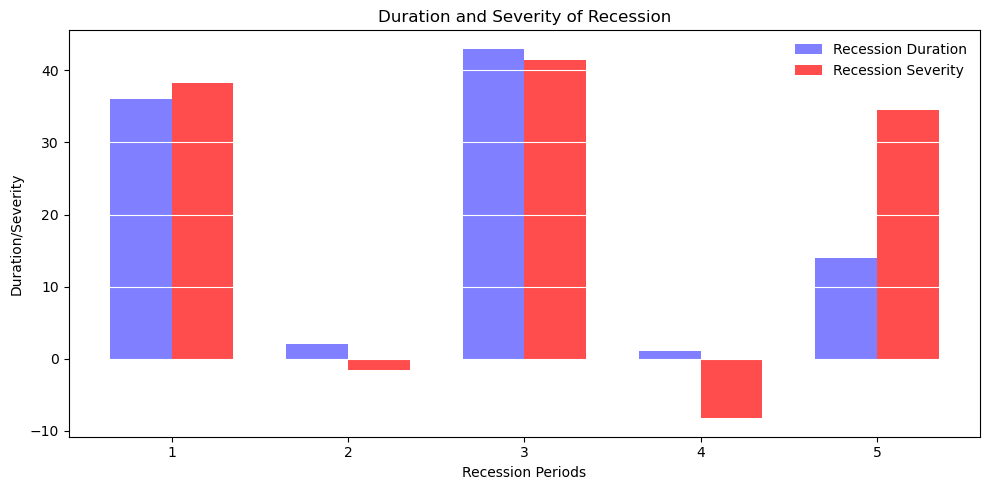

In [17]:

fig, ax = plt.subplots(figsize=(10, 5))

bar_width = 0.35

x = np.arange(len(recession_duration.index))

ax.bar(x - bar_width/2, recession_duration, width=bar_width, color='blue', alpha=0.5, label='Recession Duration')

ax.bar(x + bar_width/2, recession_severity, width=bar_width, color='red', alpha=0.7, label='Recession Severity')

ax.grid(axis='y', color='white')
ax.legend(frameon=False)
ax.set_xlabel('Recession Periods')
ax.set_ylabel('Duration/Severity')
ax.set_title('Duration and Severity of Recession')

ax.set_xticks(x)
ax.set_xticklabels(recession_duration.index)
plt.xticks(rotation=0)

plt.tight_layout()
plt.show()


**Nowcasting-US**

In [18]:

rec = web.DataReader(['USRECD', 'DBAA', 'DAAA', 'T10Y2Y'], 'fred', start = '2000-01-01')
rec['credit_spread'] = rec['DBAA'] - rec['DAAA']
rec

,USRECD,DBAA,DAAA,T10Y2Y,credit_spread
DATE,,,,,
2000-01-01,0.0,NaN,NaN,NaN,NaN
2000-01-02,0.0,NaN,NaN,NaN,NaN
2000-01-03,0.0,8.27,7.75,0.20,0.52
2000-01-04,0.0,8.21,7.69,0.19,0.52
2000-01-05,0.0,8.29,7.78,0.24,0.51
...,...,...,...,...,...
2024-04-01,0.0,5.82,5.09,-0.39,0.73
2024-04-02,0.0,5.87,5.13,-0.34,0.74
2024-04-03,0.0,5.85,5.12,-0.32,0.73


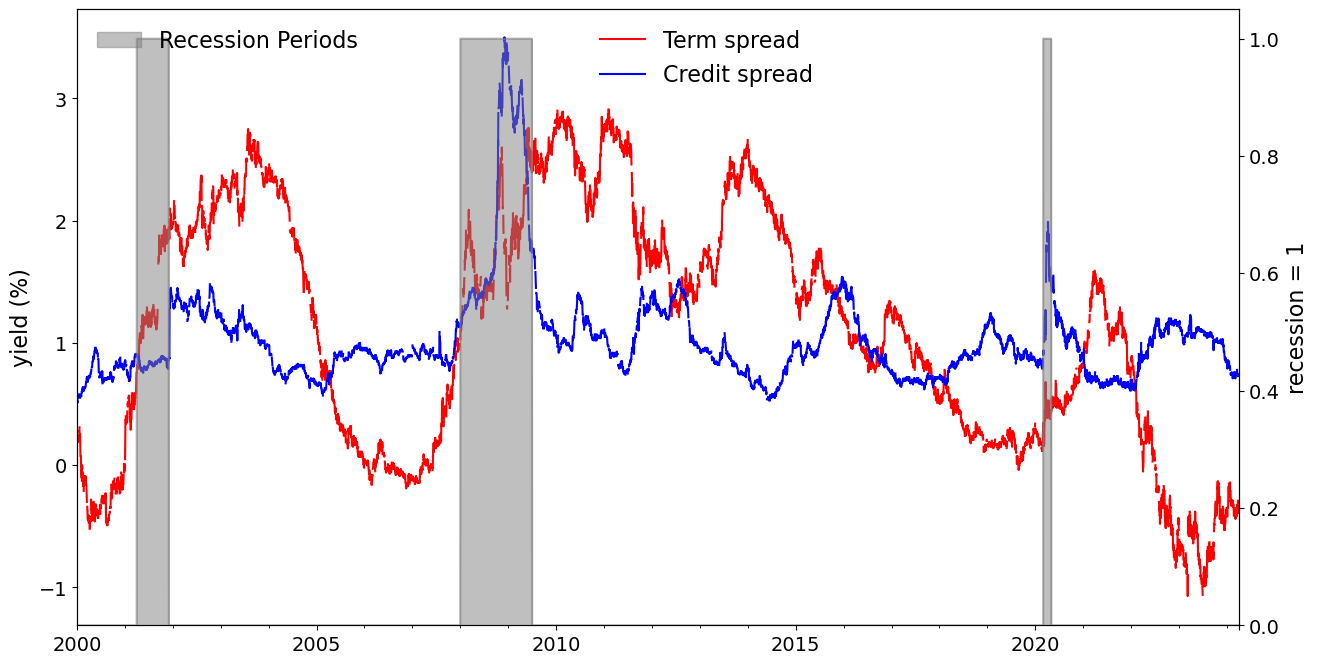

In [19]:
fig, ax = plt.subplots(figsize=(15,8))


ax.plot(rec.index, rec['T10Y2Y'], color = 'red', label='Term spread')
ax.plot(rec.index, rec['credit_spread'], color='blue', label='Credit spread')

ax2 = ax.twinx()

rec['USRECD'].plot.area(ax=ax2, alpha=0.5, color='grey', label='Recession Periods')
ax.set_ylabel('yield (%)', fontsize=16)
ax2.set_ylabel('recession = 1', fontsize=16)

ax.legend(frameon=False, fontsize=16, bbox_to_anchor=(0.65, 1))
ax2.legend(frameon=False, fontsize=16, loc='upper left')

for a in [ax, ax2]:
    a.tick_params(axis='both', labelsize=14)

plt.show()

In [20]:
res_rec = smf.logit('USRECD ~ credit_spread + T10Y2Y', data=rec).fit()
rec_probs = np.exp(res_rec.fittedvalues) / ( 1+np.exp(res_rec.fittedvalues) )

Optimization terminated successfully.
         Current function value: 0.218311
         Iterations 8


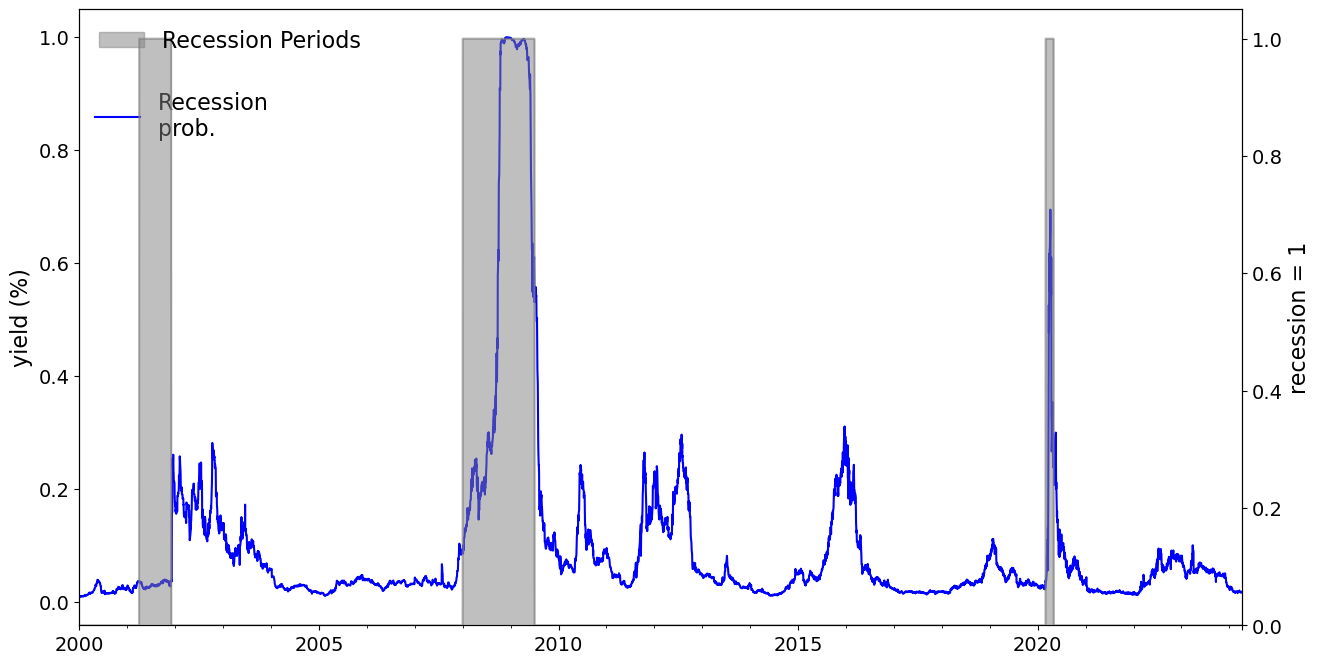

In [21]:
fig, ax = plt.subplots(figsize=(15,8))

ax.plot(rec_probs.index, rec_probs, color = 'blue', label='Recession\nprob.')

ax2 = ax.twinx()
rec['USRECD'].plot.area(ax=ax2, alpha=0.5, color='grey', label='Recession Periods')

ax.set_ylabel('yield (%)', fontsize=16)
ax2.set_ylabel('recession = 1', fontsize=16)

ax.legend(frameon=False, fontsize=16, bbox_to_anchor=(0.18, 0.9))
ax2.legend(frameon=False, fontsize=16, loc='upper left')

for a in [ax, ax2]:
    a.tick_params(axis='both', labelsize=14)

plt.show()